# **Books to Scrape — Web Scraping & Analysis**
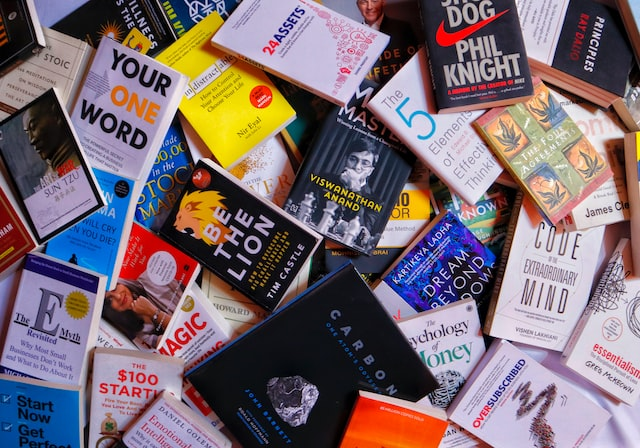

## Install libraries

In [1]:
!pip install requests beautifulsoup4 pandas matplotlib

## Web Scraping (Books to Scrape)

In [2]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
import re
import time

base_url = "http://books.toscrape.com/catalogue/page-{}.html"
all_books = []

for page in range(1, 51):
    url = base_url.format(page)
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text, "html.parser")

    cards = soup.select("article.product_pod")
    print(f"Page {page}: found {len(cards)} books")

    for b in cards:
        title = b.h3.a["title"]
        price_text = b.select_one("p.price_color").get_text(strip=True)
        price = float(re.sub(r"[^\d.]", "", price_text))  # remove £ sign
        availability = " ".join(b.select_one("p.instock.availability").get_text().split())
        rating = b.select_one("p.star-rating")["class"][1]

        link = urljoin(url, b.h3.a["href"])
        all_books.append([title, price, availability, rating, link])


df = pd.DataFrame(all_books, columns=["Title","Price","Availability","Rating","Link"])

print("Done! Scraped", len(df), "books in total.")
df.to_csv("books_raw.csv", index=False)
df.head()

Page 1: found 20 books
Page 2: found 20 books
Page 3: found 20 books
Page 4: found 20 books
Page 5: found 20 books
Page 6: found 20 books
Page 7: found 20 books
Page 8: found 20 books
Page 9: found 20 books
Page 10: found 20 books
Page 11: found 20 books
Page 12: found 20 books
Page 13: found 20 books
Page 14: found 20 books
Page 15: found 20 books
Page 16: found 20 books
Page 17: found 20 books
Page 18: found 20 books
Page 19: found 20 books
Page 20: found 20 books
Page 21: found 20 books
Page 22: found 20 books
Page 23: found 20 books
Page 24: found 20 books
Page 25: found 20 books
Page 26: found 20 books
Page 27: found 20 books
Page 28: found 20 books
Page 29: found 20 books
Page 30: found 20 books
Page 31: found 20 books
Page 32: found 20 books
Page 33: found 20 books
Page 34: found 20 books
Page 35: found 20 books
Page 36: found 20 books
Page 37: found 20 books
Page 38: found 20 books
Page 39: found 20 books
Page 40: found 20 books
Page 41: found 20 books
Page 42: found 20 books
P

,Title,Price,Availability,Rating,Link
0,A Light in the Attic,51.77,In stock,Three,http://books.toscrape.com/catalogue/a-light-in...
1,Tipping the Velvet,53.74,In stock,One,http://books.toscrape.com/catalogue/tipping-th...
2,Soumission,50.10,In stock,One,http://books.toscrape.com/catalogue/soumission...
3,Sharp Objects,47.82,In stock,Four,http://books.toscrape.com/catalogue/sharp-obje...
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five,http://books.toscrape.com/catalogue/sapiens-a-...


## Load the Dataset and Check it

In [3]:
df = pd.read_csv("books_raw.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1000 non-null   object 
 1   Price         1000 non-null   float64
 2   Availability  1000 non-null   object 
 3   Rating        1000 non-null   object 
 4   Link          1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


,Title,Price,Availability,Rating,Link
0,A Light in the Attic,51.77,In stock,Three,http://books.toscrape.com/catalogue/a-light-in...
1,Tipping the Velvet,53.74,In stock,One,http://books.toscrape.com/catalogue/tipping-th...
2,Soumission,50.10,In stock,One,http://books.toscrape.com/catalogue/soumission...
3,Sharp Objects,47.82,In stock,Four,http://books.toscrape.com/catalogue/sharp-obje...
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five,http://books.toscrape.com/catalogue/sapiens-a-...


## Data Cleaning

In [4]:
df["InStock"] = df["Availability"].str.contains("In stock").astype(int)
df = df.drop(columns=["Availability"])

In [5]:
rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}

df["Rating"] = df["Rating"].map(rating_map)

In [6]:
df.head()

,Title,Price,Rating,Link,InStock
0,A Light in the Attic,51.77,3,http://books.toscrape.com/catalogue/a-light-in...,1
1,Tipping the Velvet,53.74,1,http://books.toscrape.com/catalogue/tipping-th...,1
2,Soumission,50.10,1,http://books.toscrape.com/catalogue/soumission...,1
3,Sharp Objects,47.82,4,http://books.toscrape.com/catalogue/sharp-obje...,1
4,Sapiens: A Brief History of Humankind,54.23,5,http://books.toscrape.com/catalogue/sapiens-a-...,1


## Exploratory Data Analysis (EDA)

In [7]:
print("Average price: £", round(df["Price"].mean(), 2))
print("Median price: £", round(df["Price"].median(), 2))
print("Most expensive book: £", df["Price"].max())
print("Cheapest book: £", df["Price"].min())

Average price: £ 35.07
Median price: £ 35.98
Most expensive book: £ 59.99
Cheapest book: £ 10.0


In [8]:
print(df["Rating"].value_counts())

Rating
1    226
3    203
5    196
2    196
4    179
Name: count, dtype: int64


In [9]:
print(df["InStock"].value_counts())

InStock
1    1000
Name: count, dtype: int64


## Data Visualization

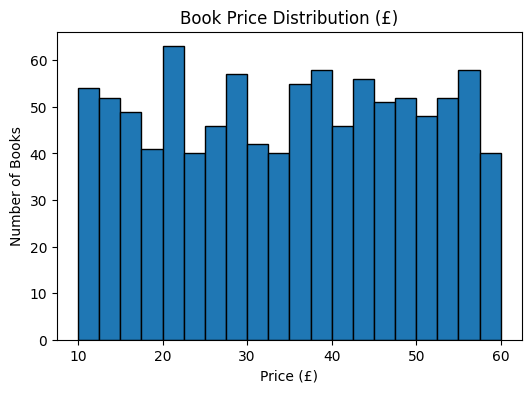

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df["Price"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Book Price Distribution (£)")
plt.xlabel("Price (£)")
plt.ylabel("Number of Books")
plt.show()

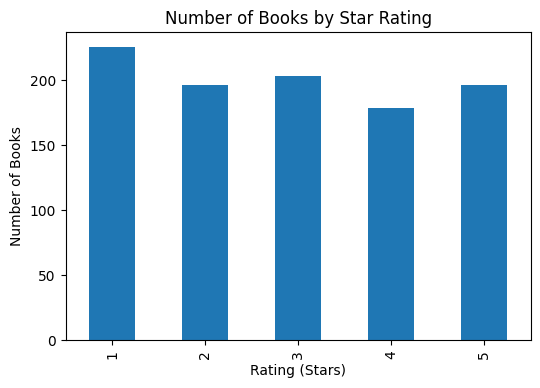

In [11]:
plt.figure(figsize=(6,4))
df["Rating"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Books by Star Rating")
plt.xlabel("Rating (Stars)")
plt.ylabel("Number of Books")
plt.show()